In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-1, 1)

In [3]:
def one(x):
    return 1 / (1 - np.square(x))

def two(x):
    return (1/2) * (np.exp(x) + np.exp(-x))

/home/alw/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


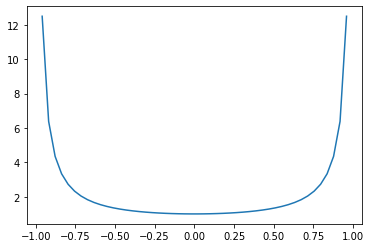

In [5]:
plt.plot(x, one(x))

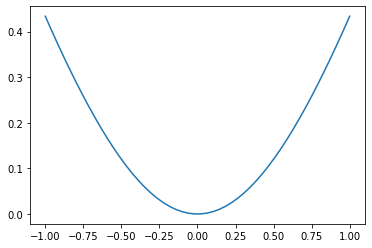

In [6]:
plt.plot(x, np.log(two(x)))

In [7]:
# Toy problem from front page
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

result = prob.solve()

print("status: ", prob.status)
print("optimal value: ", result)
print("optimal solution:\n", x.value)
print("dual constraints:\n", constraints[0].dual_value)

status:  optimal
optimal value:  19.83126370644502
optimal solution:
 [-1.79109253e-19  2.85112420e-02  2.79973443e-19  3.37658751e-20
 -2.72802659e-19  1.49285011e-01 -9.97212062e-20  8.35373892e-20
  2.46718649e-01  5.78224144e-01 -4.03739462e-19  1.01242860e-03
 -9.28486200e-20  2.26767464e-01 -1.58813677e-19 -8.97232308e-20
 -1.22145726e-19 -1.51509432e-19  1.12060673e-19 -3.48318630e-19]
dual constraints:
 [ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


CVXPY automatically transforms an optimization problem statement into standard form, calls a solver, and unpacks the results.

**Problems** are immutable. To change objectives or constraints, just create another problem.

In [8]:
x = cp.Variable()
y = cp.Variable()

constraints = [x + y == 1,
                x - y >= 3]

obj = cp.Minimize((x - y)**2)

prob = cp.Problem(obj, constraints)
prob.solve()
print("status: ", prob.status)
print("x - y value:", (x - y).value)
print("optimal var: ", x.value, y.value)
print("optimal (x + y == 1) dual variable", constraints[0].dual_value)
print("optimal (x - y >= 1) dual variable", constraints[1].dual_value)


status:  optimal
x - y value: 3.0
optimal var:  2.0 -1.0
optimal (x + y == 1) dual variable 2.220446049250313e-16
optimal (x - y >= 1) dual variable 6.000000000000001


In [9]:
prob2 = cp.Problem(cp.Minimize(x), [x >= 1, x <= 0])
prob2.solve()
print("status: ", prob2.status)
print("optimal value: ", prob2.value)

prob3 = cp.Problem(cp.Minimize(x))
prob3.solve()
print("status: ", prob3.status)
print("optimal value: ", prob3.value)

status:  infeasible
optimal value:  inf
status:  unbounded
optimal value:  -inf


In [10]:
# A problem with matrices
m = 10
n = 5
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

x = cp.Variable(n)
obj = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(obj, constraints)

print("Optimal value", prob.solve())
print("Optimal var")
print(x.value) # A numpy ndarray.

Optimal value 4.141338603672535
Optimal var
[-4.95922264e-21  6.07571976e-21  1.34643668e-01  1.24976681e-01
 -4.57130806e-21]


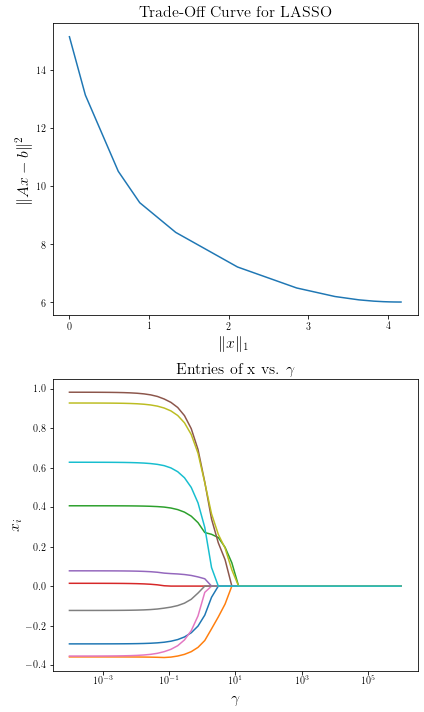

In [11]:
# Parameter use for regularized regression
n = 10
m = 15

A = np.random.randn(m, n)
b = np.random.randn(m)

gamma = cp.Parameter(nonneg=True)

x = cp.Variable(n)
error = cp.sum_squares(A @ x - b)
obj = cp.Minimize(error + gamma * cp.norm(x, 1))  # LASSO ell-1
prob = cp.Problem(obj)

sq_penalty = []
l1_penalty = []
x_values = []
gamma_vals = np.logspace(-4, 6)
for val in gamma_vals:
    gamma.value = val
    prob.solve()
    sq_penalty.append(error.value)
    l1_penalty.append(cp.norm(x, 1).value)
    x_values.append(x.value)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(6, 10))

plt.subplot(211)
plt.plot(l1_penalty, sq_penalty)
plt.xlabel(r'$\|x\|_1$', fontsize=16)
plt.ylabel(r'$\|Ax - b\|^2$', fontsize=16)
plt.title('Trade-Off Curve for LASSO', fontsize=16)

plt.subplot(212)
for i in range(n):
    plt.plot(gamma_vals, [xi[i] for xi in x_values])
plt.xlabel(r'$\gamma$', fontsize=16)
plt.ylabel(r'$x_{i}$', fontsize=16)
plt.xscale('log')
plt.title(r'Entries of x vs. $\gamma$', fontsize=16)

plt.tight_layout()
plt.show()

Text(0, 0.5, '$-e^x$')

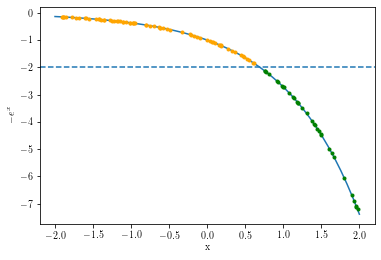

In [12]:
domf = (-2, 2)
alpha = -2
x = np.linspace(*domf)
fx = lambda i: - np.exp(i)
plt.plot(x, fx(x))
plt.axhline(alpha, ls="--")

xs = np.random.uniform(*domf, size=100)
sublevel = fx(xs) <= alpha
superlevel = np.logical_not(sublevel)
plt.plot(xs[sublevel], fx(xs[sublevel]), ls='None', marker='.', color="green")
plt.plot(xs[superlevel], fx(xs[superlevel]), ls='None', marker='.', color="orange")

plt.xlabel(r'x')
plt.ylabel(r'$-e^x$')

In [20]:
mix = lambda x, y: fx(0.5 * x + 0.5 * y)
x1 = .7
x2 = 2
print(0.5*fx(x1) + 0.5*fx(x2), mix(x1, x2))

-4.701404403200564 -3.8574255306969745


In [24]:
x1 = cp.Variable(nonneg=True)
x2 = cp.Variable(nonneg=True)

constraints = [2*x1 + x2 >= 1,
               x1 + 3*x2 >= 1]

f0 = x1 + x2
f1 = x1**2 + 9*x2**2

prob0 = cp.Problem(cp.Minimize(f0), constraints)
prob1 = cp.Problem(cp.Minimize(f1), constraints)
prob0.solve()
print(f"({x1.value}, {x2.value})->{prob0.value}")
prob1.solve()
print(f"({x1.value}, {x2.value})->{prob1.value}")

(0.39999999997244906, 0.19999999993917628)->0.5999999999116253
(0.5000000000000001, 0.1666666666666667)->0.5000000000000002


## Boolean Relaxation
$$
\begin{align*}
& \underset{x}{\text{minimize}} & & c^T x \\
& \text{subject to} & & Ax \preceq b\\
& & & x_i \in \{0, 1\}, \; i = 1, \ldots, m.
\end{align*}
$$
If $x$ has $n$ variables there are $2^n$ possible values to brute force verify the optimal value $p^*$. Each value $x_i$ can be a job either accepted or declined, and $-c_i$ as the (positive) revenue for accepting job $i$. The constraints $Ax \preceq b$ are a set of $m$ resource limits. $A_{ij}$ is the amount of resource $i$ comsumed if job $j$ is accepted; $b_i$ is the amount of resource available. 

Let $x^{rlx}$ be a solution of the LP relaxation
$$
\begin{align*}
& \underset{x}{\text{minimize}} & & c^T x \\
& \text{subject to} & & Ax \preceq b\\
& & & 0 \preceq x \preceq \mathbf 1,
\end{align*}
$$
so $L = c^T x^{rlx}$ is a lower bound on $p^*$.

In [101]:
rng = np.random.default_rng(0)
n = 100
m = 300
A = rng.random(size=(m, n))
b = (A @ np.ones((n,1))/2).flatten()
c = -rng.random(size=(n, 1))
x = cp.Variable(n)

f0 = cp.Minimize(c.T @ x)
constraints = [A @ x <= b,
                x >= 0, x <= 1]
prob = cp.Problem(f0, constraints)
prob.solve()
L = prob.value
print("Lower bound p* =", L)

Lower bound p* = -31.32240739560737


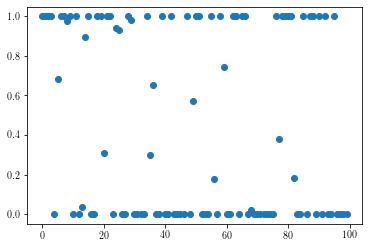

In [92]:
plt.plot(x.value, 'o')

The relaxed solution can be used as a guess for a Boolean point $\hat x$, by rounding its entries, based on a threshold $t \in [0, 1]$:
$$
\hat x_i = \begin{cases}
1 &\quad x_i^{rlx} \geq t\\
0 &\quad \text{otherwise}.
\end{cases}
$$
The objective value $U = c^T \hat x$ is an upperbound on $p^*$.

In [82]:
t_param = np.linspace(0, 1, 100)
obj = []
maxviol = []
for t in t_param:
    xhat = x.value >= t
    obj.append(c.T @ xhat)
    maxviol.append((A @ xhat - b).max())

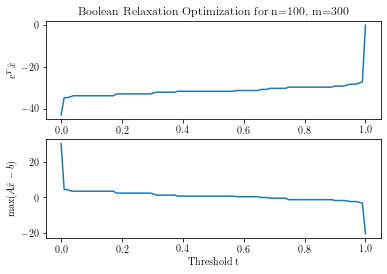

In [91]:
_, ax = plt.subplots(2, 1)
ax[0].set_title("Boolean Relaxation Optimization for n=100, m=300")
ax[0].plot(t_param, obj)
ax[0].set_ylabel(r"$c^T\hat x$")
ax[1].plot(t_param, maxviol)
ax[1].set_ylabel(r"$\max (A \hat x - b)$")
ax[1].set_xlabel("Threshold t");

In [100]:
U = np.array(obj)[np.array(maxviol) <= 0].min()
print("U - L =", U - L)

U - L = 0.7158319574535383


## Simple portfolio optimization

In [134]:
# simple_portfolio_data
rng = np.random.default_rng(5)
n=20
pbar = np.ones(n)*.03+ np.append(rng.random(n-1), 0)*.12
# pbar = pbar.reshape(-1, 1)

S = rng.standard_normal(size=(n,n))
S = S.T @ S
S = S/np.max(np.abs(np.diag(S)))*.2
S[:,-1] = 0
S[-1, :] = 0
x_unif = np.ones((n,1))/n

In [142]:
x_unif.T @ S @ x_unif

array([[0.00694791]])

In [158]:
x = cp.Variable(n)
risk = cp.Minimize(cp.quad_form(x, S))
constraints = [pbar.T @ x == pbar.T @ x_unif,
            np.ones(n) @ x == 1,
            np.ones(n) @ cp.maximum(-x, np.zeros(n)) <= 0.5
            ]
portfolio = cp.Problem(risk, constraints)
portfolio.solve()

0.0008108653291694134

In [163]:
np.diag(S)

array([0.10509662, 0.2       , 0.17016146, 0.1185965 , 0.10386855,
       0.11229675, 0.19452588, 0.1715163 , 0.1387476 , 0.17948996,
       0.17371766, 0.11848555, 0.14148078, 0.07166171, 0.11201423,
       0.1565625 , 0.13298619, 0.08552065, 0.10536455, 0.        ])

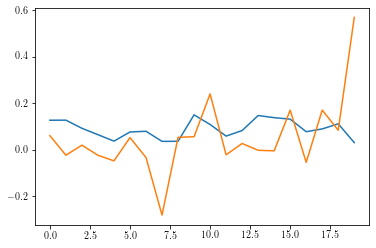

In [164]:
plt.plot(pbar)
plt.plot(x.value)